#**Understanding JAAD Dataset**

**Goal of this colab notebook is to extract JAAD data and understand the JAAD dataset.**

References:
1. Are They Going to Cross? A Benchmark Dataset and Baseline for Pedestrian Crosswalk Behavior [[Paper](https://openaccess.thecvf.com/content_ICCV_2017_workshops/papers/w3/Rasouli_Are_They_Going_ICCV_2017_paper.pdf)] [[Code](https://github.com/ykotseruba/JAAD.git)]

![JAAD Image](https://raw.githubusercontent.com/ykotseruba/JAAD/JAAD_2.0/behavior.png)

## Instructions to run Google Colab

1. Connect Runtime to CPU for better/faster results **[RunTime -> Change RunTime Type -> None]**
2. *To be added*

## 0. Prerequisites

In [ ]:
# Check whether GPU is provided
!nvidia-smi
!nvcc --version

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# Mount your Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Check Python Version and import os to evaluate current directories
!python --version

Python 3.7.10


In [ ]:
# Import required libraries
import os
import cv2
import pprint
import pickle
import pandas as pd
from graphviz import Digraph
import matplotlib.pyplot as plt

## 1. Extract Overall Annotations

### 1.1. Clone the JAAD Dataset and Install Dependencies

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content', 'Directory should be "/content" instead of "{}"'.format(os.getcwd())

# Clone GitHub Repository
!git clone https://github.com/ykotseruba/JAAD.git
%cd JAAD

# Install dependecies
!pip install opencv-python
!pip install numpy
!pip install scikit-learn

# Change Directory
%cd ..

Cloning into 'JAAD'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (325/325), done.
remote: Compressing objects: 100% (292/292), done.
remote: Total 5756 (delta 306), reused 39 (delta 33), pack-reused 5431
Receiving objects: 100% (5756/5756), 39.49 MiB | 6.22 MiB/s, done.
Resolving deltas: 100% (5125/5125), done.
Checking out files: 100% (1745/1745), done.
/content/JAAD
/content


### 1.2. Download the JAAD Dataset

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content', 'Directory should be "/content" instead of "{}"'.format(os.getcwd())

# Download the JAAD_clips from the JAAD Website
!wget -v http://data.nvision2.eecs.yorku.ca/JAAD_dataset/data/JAAD_clips.zip

# Extract JAAD Clips
!unzip JAAD_clips.zip

# Remove the JAAD_clips.zip from Files
!rm -rf JAAD_clips.zip

--2021-03-30 14:41:43--  http://data.nvision2.eecs.yorku.ca/JAAD_dataset/data/JAAD_clips.zip
Resolving data.nvision2.eecs.yorku.ca (data.nvision2.eecs.yorku.ca)... 130.63.92.182
Connecting to data.nvision2.eecs.yorku.ca (data.nvision2.eecs.yorku.ca)|130.63.92.182|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3084055074 (2.9G) [application/zip]
Saving to: ‘JAAD_clips.zip’

JAAD_clips.zip      100%[===================>]   2.87G  15.6MB/s    in 4m 10s  

2021-03-30 14:45:53 (11.8 MB/s) - ‘JAAD_clips.zip’ saved [3084055074/3084055074]

Archive:  JAAD_clips.zip
   creating: JAAD_clips/
  inflating: JAAD_clips/video_0286.mp4  
  inflating: JAAD_clips/video_0006.mp4  
  inflating: JAAD_clips/video_0109.mp4  
  inflating: JAAD_clips/video_0130.mp4  
  inflating: JAAD_clips/video_0210.mp4  
  inflating: JAAD_clips/video_0320.mp4  
  inflating: JAAD_clips/video_0162.mp4  
  inflating: JAAD_clips/video_0205.mp4  
  inflating: JAAD_clips/video_0046.mp4  
  inflating: JAA

### 1.3. Convert the JAAD Clips into Images

**Important:** Since there is not enough space on Google Colab to convert all the videos into images, all videos except one is deleted

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content', 'Directory should be "/content" instead of "{}"'.format(os.getcwd())

# Copy one video to convert the video into images and get the annotations
!cp -v ./JAAD_clips/video_0001.mp4 .
!rm -rvf ./JAAD_clips/*.mp4
!cp -v ./video_0001.mp4 ./JAAD_clips/
!rm -rvf ./*.mp4
!mv -vi ./JAAD_clips ./JAAD/

# Change Current Directory
%cd JAAD

'./JAAD_clips/video_0001.mp4' -> './video_0001.mp4'
removed './JAAD_clips/video_0001.mp4'
removed './JAAD_clips/video_0002.mp4'
removed './JAAD_clips/video_0003.mp4'
removed './JAAD_clips/video_0004.mp4'
removed './JAAD_clips/video_0005.mp4'
removed './JAAD_clips/video_0006.mp4'
removed './JAAD_clips/video_0007.mp4'
removed './JAAD_clips/video_0008.mp4'
removed './JAAD_clips/video_0009.mp4'
removed './JAAD_clips/video_0010.mp4'
removed './JAAD_clips/video_0011.mp4'
removed './JAAD_clips/video_0012.mp4'
removed './JAAD_clips/video_0013.mp4'
removed './JAAD_clips/video_0014.mp4'
removed './JAAD_clips/video_0015.mp4'
removed './JAAD_clips/video_0016.mp4'
removed './JAAD_clips/video_0017.mp4'
removed './JAAD_clips/video_0018.mp4'
removed './JAAD_clips/video_0019.mp4'
removed './JAAD_clips/video_0020.mp4'
removed './JAAD_clips/video_0021.mp4'
removed './JAAD_clips/video_0022.mp4'
removed './JAAD_clips/video_0023.mp4'
removed './JAAD_clips/video_0024.mp4'
removed './JAAD_clips/video_0025.mp4

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Convert the JAAD Clips into Images
from jaad_data import JAAD
jaad_path = './'
imdb = JAAD(data_path=jaad_path)
imdb.extract_and_save_images()

video_0001
[####################] 99.83% 



### 1.4. Extract overall annotations

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Extract all the annotations
#imdb.generate_database()

**Congratulations! You have now successfully convert one JAAD clip into images and generated overall annotations!** 

## 2. Extract Detection Annotations

### 2.1. Generate Detection Annotations Based on YOLOv3 Format

**Important:** For more information, read the documentation [here](https://github.com/ykotseruba/JAAD#sequence-analysis) and the code [here](https://github.com/ykotseruba/JAAD/blob/60ac86dc87015651a3bb2fa22f2edaf48711f629/jaad_data.py#L761).

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Generate Detection Data Based on YOLOv3 Format
imdb.get_detection_data(image_set='all', method='yolo3', fstride=1, \
                        sample_type='all', subset='default',\
                        height_rng=None, squarify_ratio=0, \
                        data_split_type='default', seq_type='intention', \
                        min_track_size=0)                        

---------------------------------------------------------
Generating database for jaad
Getting annotations for video_0001
Getting annotations for video_0002
Getting annotations for video_0003
Getting annotations for video_0004
Getting annotations for video_0005
Getting annotations for video_0006
Getting annotations for video_0007
Getting annotations for video_0008
Getting annotations for video_0009
Getting annotations for video_0010
Getting annotations for video_0011
Getting annotations for video_0012
Getting annotations for video_0013
Getting annotations for video_0014
Getting annotations for video_0015
Getting annotations for video_0016
Getting annotations for video_0017
Getting annotations for video_0018
Getting annotations for video_0019
Getting annotations for video_0020
Getting annotations for video_0021
Getting annotations for video_0022
Getting annotations for video_0023
Getting annotations for video_0024
Getting annotations for video_0025
Getting annotations for video_0026
Get

('data/yolo3_all.txt', 'data/mapping_yolo3')

### 2.2. Display Generated Annotations and Detections


Image 1 has 2 number of annotations
x1: 465, y1: 730, x2: 533, y2: 848, class: 0
x1: 1398, y1: 654, x2: 1486, y2: 892, class: 0

Image 2 has 2 number of annotations
x1: 463, y1: 730, x2: 532, y2: 848, class: 0
x1: 1402, y1: 655, x2: 1490, y2: 894, class: 0


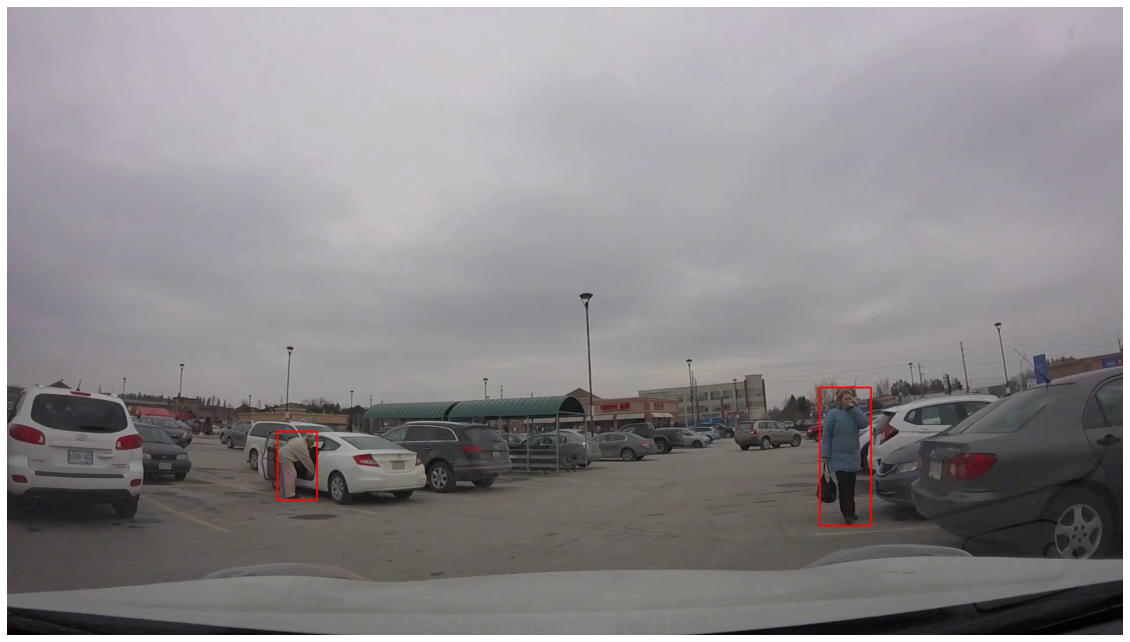

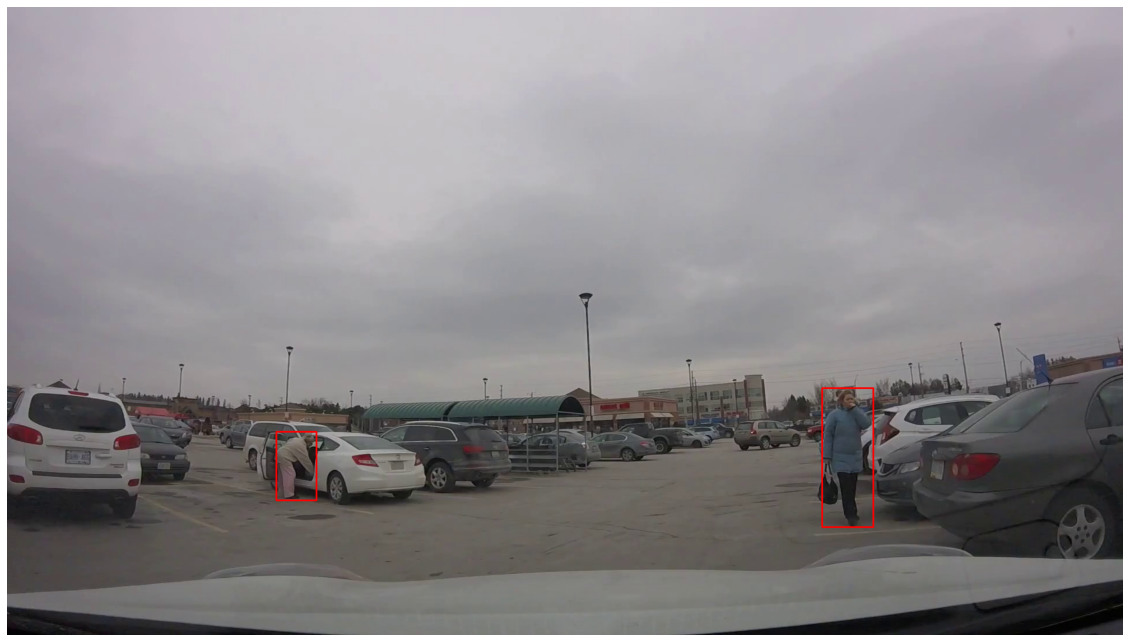

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Input Parameters
yoloAnnotationPath = "./data/yolo3_all.txt"
numberOfSamples = 2     # Can be changed length

# Display Generated Annotations and Detections
with open(yoloAnnotationPath, "r") as yoloAnnotationFile:
  for iterator, annotationData in enumerate(yoloAnnotationFile):
    if iterator < numberOfSamples:
      imagePath = annotationData.split()[0]
      sampleImage = cv2.imread(imagePath)
      print("\nImage {} has {} number of annotations".format((iterator+1),(len(annotationData.split())-1)))
      for annotationIterator in annotationData.split()[1:]:
        individualAnnotations = annotationIterator.split(',')
        x1 = int(individualAnnotations[0])
        y1 = int(individualAnnotations[1])
        x2 = int(individualAnnotations[2])
        y2 = int(individualAnnotations[3])
        classValue = int(individualAnnotations[4])
        print("x1: {}, y1: {}, x2: {}, y2: {}, class: {}".format(x1,y1,x2,y2,classValue))
        cv2.rectangle(sampleImage, (x1,y1), (x2,y2), (0,0,255), 2)
      imagePath = imagePath[:-4] + "_updated.png"
      cv2.imwrite(imagePath, sampleImage)
      fig = plt.figure(figsize=(20,20))
      sampleImage = plt.imread(imagePath)
      plt.axis(False)
      plt.imshow(sampleImage)
    else:
      break


## 3. Extract Trajectory Annotations

### 3.1. Generate Trajectory Annotations from JAAD Dataset

**Important:** For more information, read the documentation [here](https://github.com/ykotseruba/JAAD#sequence-analysis) and the code [here](https://github.com/ykotseruba/JAAD/blob/60ac86dc87015651a3bb2fa22f2edaf48711f629/jaad_data.py#L983).

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Generate Trajectory Annotations
trajectories = imdb.generate_data_trajectory_sequence(image_set='all', \
                                                      fstride=1, sample_type='all', \
                                                      subset='default', height_rng=[0, float('inf')], \
                                                      squarify_ratio=0, data_split_type='default', \
                                                      seq_type='trajectory', min_track_size=0)         

---------------------------------------------------------
Generating action sequence data
fstride: 1
sample_type: all
subset: default
height_rng: [0, inf]
squarify_ratio: 0
data_split_type: default
seq_type: trajectory
min_track_size: 0
random_params: {'ratios': None, 'val_data': True, 'regen_data': False}
kfold_params: {'num_folds': 5, 'fold': 1}
---------------------------------------------------------
Generating database for jaad
jaad database loaded from /content/JAAD/data_cache/jaad_database.pkl
---------------------------------------------------------
Generating trajectory data
Split: all
Number of pedestrians: 2580 
Total number of samples: 2580 


### 3.2. Display Generated Annotations and Trajectories

**Important:** Since files of sizes more than 10MB cannot be read and displayed on the console, the annotations of one video is displayed on the console.

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Save Generated Trajectories as a pickle file
trajectoryPath = "./data_cache/jaad_trajectories.pkl"

with open(trajectoryPath, "wb") as trajectoryFile:
  pickle.dump(trajectories, trajectoryFile, protocol=pickle.HIGHEST_PROTOCOL)

# Display Generated Annotations and Trajectories
with open('./data_cache/jaad_trajectories.pkl', 'rb') as trajectoryFile:
  jaadTrajectories = pd.read_pickle(trajectoryFile)
  print("Trajectories Generated!")
  print("Overall Size of Trajectories: {}".format(len(jaadTrajectories)))
  pprint.pprint(jaadTrajectories, depth=1)

Trajectories Generated!
Overall Size of Trajectories: 7
{'bbox': [...],
 'center': [...],
 'image': [...],
 'intent': [...],
 'occlusion': [...],
 'pid': [...],
 'vehicle_act': [...]}


## 4. Analyze Overall JAAD Data

### 4.0. Helper Functions

In [ ]:
def plot_bar(xData, yData, plotProperties):
  """
  Helper function to plot bar

  Parameters
  ----------
  xData           : Input data (list)
  yData           : Input data (list)
  plotProperties  : Properties of the Bar Plot (dict)
                    {
                      figureNumber  : Unique Identifier for the Plot (int),
                      figureSize    : Size of the output figure (tuple: (int, int))
                      title         : Title for the plot (str)
                      xlabel        : Label for x-axis (str)
                      ylabel        : Label for y-axis (str)
                    }

  Returns
  -------
  outputPlot      : Output Plot (matplotlib.figure.Figure)
  """

  outputPlot = plt.figure(num=plotProperties["figureNumber"],figsize=plotProperties["figureSize"])
  barContainer = plt.bar(xData, yData)
  plt.title(plotProperties["title"])
  plt.xlabel(plotProperties["xlabel"])
  plt.ylabel(plotProperties["ylabel"])

  return outputPlot

In [ ]:
def plot_histogram(data, binWidth, plotProperties):
  """
  Helper function to plot histogram

  Parameters
  ----------
  data            : Input data (list)
  binWidth        : Width of each bin (int)
  plotProperties  : Properties of the Histogram Plot (dict)
                    {
                      figureNumber  : Unique Identifier for the Plot (int),
                      figureSize    : Size of the output figure (tuple: (int, int))
                      title         : Title for the plot (str)
                      xlabel        : Label for x-axis (str)
                      ylabel        : Label for y-axis (str)
                    }

  Returns
  -------
  outputPlot      : Output Plot (matplotlib.figure.Figure)
  """

  binValue = range(int(min(data)), int(max(data)) + binWidth, binWidth)  
  outputPlot = plt.figure(num=plotProperties["figureNumber"],figsize=plotProperties["figureSize"])
  n, bins, patches = plt.hist(x=data, bins=binValue)
  plt.title(plotProperties["title"])
  plt.xlabel(plotProperties["xlabel"])
  plt.ylabel(plotProperties["ylabel"])

  return outputPlot

### 4.1. Generate Overall Annotations

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Generate Overall Annotations
with open('./data_cache/jaad_database.pkl', 'rb') as jaadData:
    overallJaadData = pd.read_pickle(jaadData)
    print("Annotations Generated!")
    print("Overall Size of Complete Annotations: {}".format(len(overallJaadData)))

Annotations Generated!
Overall Size of Complete Annotations: 346


### 4.2. Calculate Total Number of Unique Pedestrians

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

uniquePedestrianList = list()

for videoId, videoAnnotations in overallJaadData.items():
  #print(videoAnnotations.keys())
  #print(videoAnnotations["ped_annotations"].keys())
  #print(videoAnnotations["vehicle_annotations"].keys())
  #print(videoAnnotations["traffic_annotations"].keys())
  for individualPedestrian in videoAnnotations["ped_annotations"].keys():
    if individualPedestrian not in uniquePedestrianList:
      #print("Unique Pedestrian Found: {}".format(individualPedestrian))
      uniquePedestrianList.append(individualPedestrian)

print("Total Number of Unique Pedestrians: {}".format(len(uniquePedestrianList)))

Total Number of Unique Pedestrians: 2786


### 4.2. Calculate Total Number of Unique Pedestrians With Behavioral Tag

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

uniquePedestrianListWithBehavioralTag = list()

for videoId, videoAnnotations in overallJaadData.items():
  for pedId, pedestrianAnnotations in videoAnnotations["ped_annotations"].items():
    if ((pedestrianAnnotations["behavior"]) and (pedId not in uniquePedestrianListWithBehavioralTag)):
      uniquePedestrianListWithBehavioralTag.append(pedId)

print("Total Number of Unique Pedestrians With Unique Behavioral Tag: {}".format(len(uniquePedestrianListWithBehavioralTag)))

Total Number of Unique Pedestrians With Unique Behavioral Tag: 686


### 4.3. Generate Distribution for Crossing and Non-Crossing Frames

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Intialize Distribution for Crossing and Non-Crossing Frames
crossingBehaviorDistribution = {"Crossing": 0, "Not-crossing": 0, "Irrelevant": 0}

for videoId, videoAnnotations in overallJaadData.items():
  for pedId, pedestrianAnnotations in videoAnnotations["ped_annotations"].items():
    if pedId in uniquePedestrianListWithBehavioralTag:
      crossingBehaviorDistribution["Crossing"] += pedestrianAnnotations["behavior"]["cross"].count(0)
      crossingBehaviorDistribution["Not-crossing"] += pedestrianAnnotations["behavior"]["cross"].count(1)
      crossingBehaviorDistribution["Irrelevant"] += pedestrianAnnotations["behavior"]["cross"].count(2)

# Print Output Lengths
for behaviorName, behaviorCount in crossingBehaviorDistribution.items():
  print("{} Frames have {} Behavior".format(behaviorCount, behaviorName))

57653 Frames have Crossing Behavior
75047 Frames have Not-crossing Behavior
0 Frames have Irrelevant Behavior


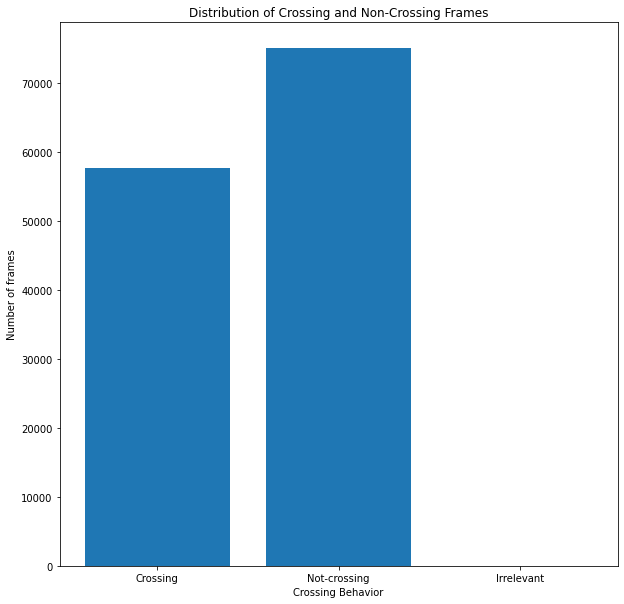

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Generate Distribution for Crossing Behavior
barPlotProperties = {"figureNumber": 0, 
                     "figureSize": (10,10),
                     "title": "Distribution of Crossing and Non-Crossing Frames",
                     "xlabel": "Crossing Behavior",
                     "ylabel": "Number of frames"}
distributionPlotCrossingBehavior = plot_bar(xData=crossingBehaviorDistribution.keys(), yData=crossingBehaviorDistribution.values(), plotProperties=barPlotProperties)

### 4.4. Generate Distribution for Bounding Box Sizes

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Initialize Distribution for Bounding Boxes Sizes
boundingBoxWidthDistribution = list()
boundingBoxHeightDistribution = list()
boundingBoxWidthWithBehaviouralTagDistribution = list()
boundingBoxHeightWithBehaviouralTagDistribution = list()

for videoId, videoAnnotations in overallJaadData.items():
  for pedId, pedestrianAnnotations in videoAnnotations["ped_annotations"].items():
    for bBoxInfoCurrentFrame in pedestrianAnnotations["bbox"]:
      bBoxWidth = bBoxInfoCurrentFrame[2] - bBoxInfoCurrentFrame[0]
      bBoxHeight = bBoxInfoCurrentFrame[3] - bBoxInfoCurrentFrame[1]
      boundingBoxWidthDistribution.append(bBoxWidth)
      boundingBoxHeightDistribution.append(bBoxHeight)
      if pedId in uniquePedestrianListWithBehavioralTag:
        boundingBoxWidthWithBehaviouralTagDistribution.append(bBoxWidth)
        boundingBoxHeightWithBehaviouralTagDistribution.append(bBoxHeight)

# Print Output Lengths
print("Length of Bounding Box Width Data: {}".format(len(boundingBoxWidthDistribution)))
print("Length of Bounding Box Height Data: {}".format(len(boundingBoxHeightDistribution)))
print("Length of Bounding Box Width with Behavioral Tag Data: {}".format(len(boundingBoxWidthWithBehaviouralTagDistribution)))
print("Length of Bounding Box Height with Behavioral Tag Data: {}".format(len(boundingBoxHeightWithBehaviouralTagDistribution)))

Length of Bounding Box Width Data: 391038
Length of Bounding Box Height Data: 391038
Length of Bounding Box Width with Behavioral Tag Data: 132700
Length of Bounding Box Height with Behavioral Tag Data: 132700


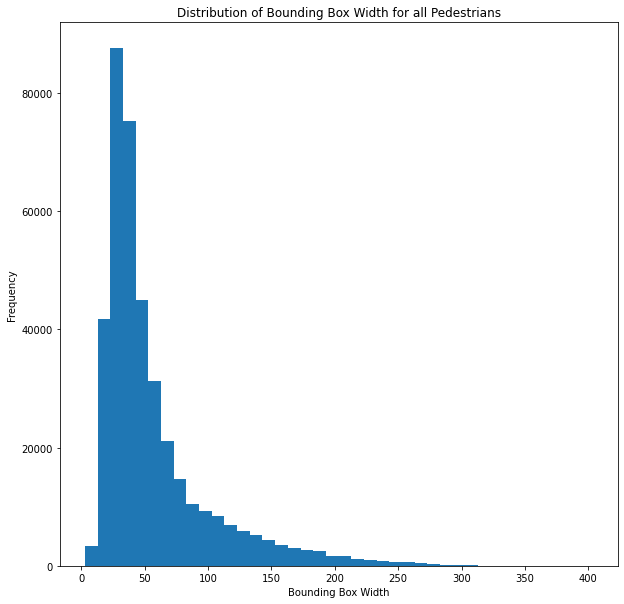

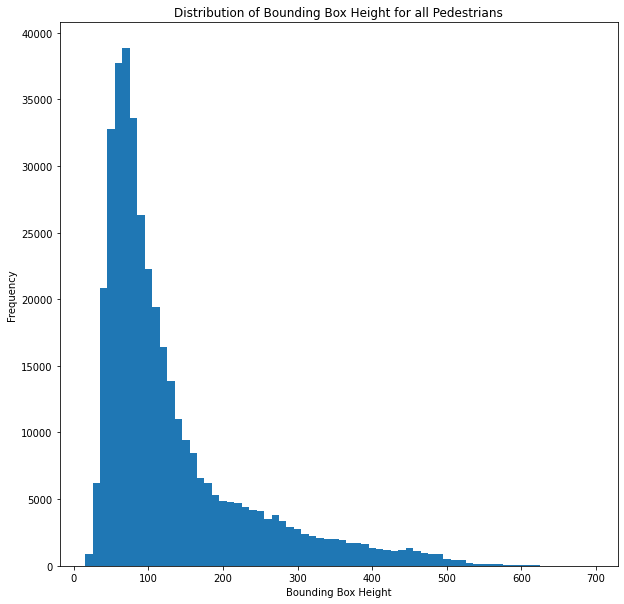

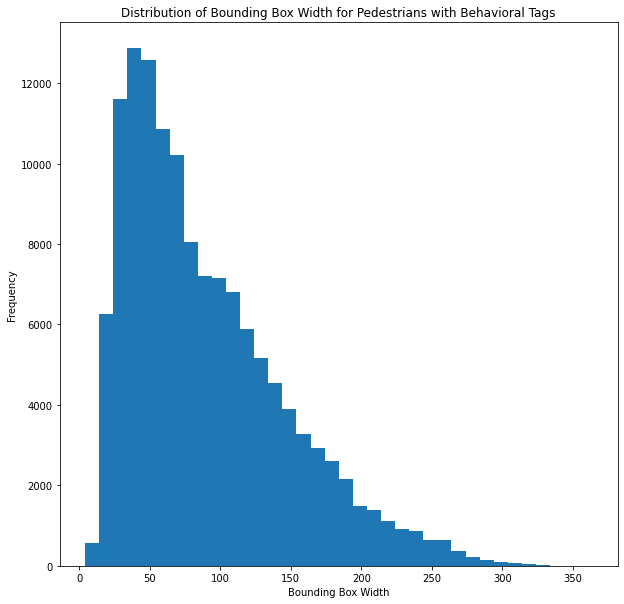

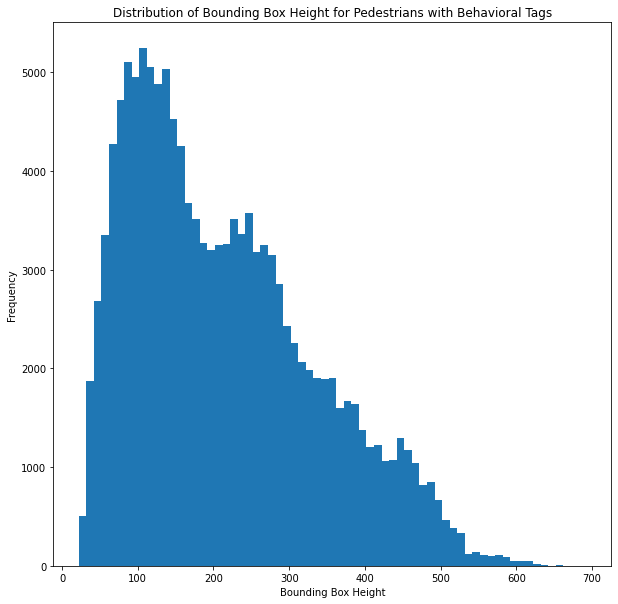

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Generate Distribution for Bounding Box Widths
histogramProperties = {"figureNumber": 1, 
                       "figureSize": (10,10),
                       "title": "Distribution of Bounding Box Width for all Pedestrians",
                       "xlabel": "Bounding Box Width",
                       "ylabel": "Frequency"}
distributionPlotBBoxWidth = plot_histogram(data=boundingBoxWidthDistribution, binWidth=10, plotProperties=histogramProperties)

# Generate Distribution for Bounding Box Heights
histogramProperties = {"figureNumber": 2, 
                       "figureSize": (10,10),
                       "title": "Distribution of Bounding Box Height for all Pedestrians",
                       "xlabel": "Bounding Box Height",
                       "ylabel": "Frequency"}
distributionPlotBBoxHeight = plot_histogram(data=boundingBoxHeightDistribution, binWidth=10, plotProperties=histogramProperties)

# Generate Distribution for Bounding Box Widths for Frames with Behavioral Tags
histogramProperties = {"figureNumber": 3, 
                       "figureSize": (10,10),
                       "title": "Distribution of Bounding Box Width for Pedestrians with Behavioral Tags",
                       "xlabel": "Bounding Box Width",
                       "ylabel": "Frequency"}
distributionPlotBBoxWidthWithBehavioralTag = plot_histogram(data=boundingBoxWidthWithBehaviouralTagDistribution, binWidth=10, plotProperties=histogramProperties)

# Generate Distribution for Bounding Box Heights for Frames with Behavioral Tags
histogramProperties = {"figureNumber": 4, 
                       "figureSize": (10,10),
                       "title": "Distribution of Bounding Box Height for Pedestrians with Behavioral Tags",
                       "xlabel": "Bounding Box Height",
                       "ylabel": "Frequency"}
distributionPlotBBoxHeightWithBehavioralTag = plot_histogram(data=boundingBoxHeightWithBehaviouralTagDistribution, binWidth=10, plotProperties=histogramProperties)

### 4.5. Generate Distribution for Occlusion

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Initialize Distribution for Occlusion
occlusionDistribution = {"None": 0, "Part": 0, "Full": 0}
occlusionDistributionWithBehaviorTag = {"None": 0, "Part": 0, "Full": 0}

for videoId, videoAnnotations in overallJaadData.items():
  for pedId, pedestrianAnnotations in videoAnnotations["ped_annotations"].items():
    occlusionDistribution["None"] += pedestrianAnnotations["occlusion"].count(0)
    occlusionDistribution["Part"] += pedestrianAnnotations["occlusion"].count(1)
    occlusionDistribution["Full"] += pedestrianAnnotations["occlusion"].count(2)
    if pedId in uniquePedestrianListWithBehavioralTag:
      occlusionDistributionWithBehaviorTag["None"] += pedestrianAnnotations["occlusion"].count(0)
      occlusionDistributionWithBehaviorTag["Part"] += pedestrianAnnotations["occlusion"].count(1)
      occlusionDistributionWithBehaviorTag["Full"] += pedestrianAnnotations["occlusion"].count(2)

# Print Output Lengths
for occlusionType, occlusionCount in occlusionDistribution.items():
  print("{} Frames have {} Occlusion".format(occlusionCount, occlusionType))

for occlusionType, occlusionCount in occlusionDistributionWithBehaviorTag.items():
  print("{} Frames With Behavioral Tags have {} Occlusion".format(occlusionCount, occlusionType))

286058 Frames have None Occlusion
55903 Frames have Part Occlusion
49077 Frames have Full Occlusion
105358 Frames With Behavioral Tags have None Occlusion
16044 Frames With Behavioral Tags have Part Occlusion
11298 Frames With Behavioral Tags have Full Occlusion


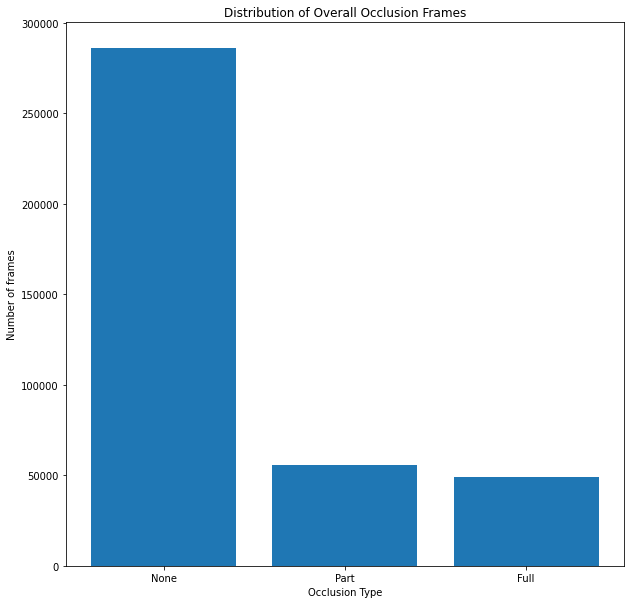

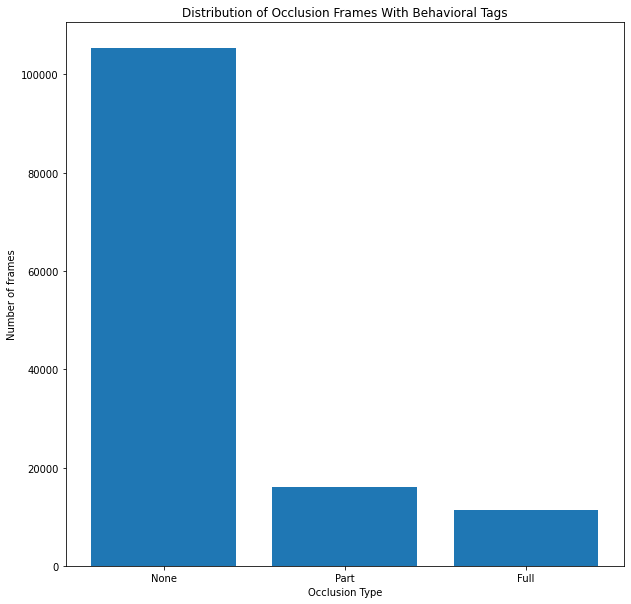

In [ ]:
# Sanity Check: Check Current Directory
assert os.getcwd()=='/content/JAAD', 'Directory should be "/content/JAAD" instead of "{}"'.format(os.getcwd())

# Generate Distribution for Occlusion
barPlotProperties = {"figureNumber": 5, 
                     "figureSize": (10,10),
                     "title": "Distribution of Overall Occlusion Frames",
                     "xlabel": "Occlusion Type",
                     "ylabel": "Number of frames"}
distributionPlotOcclusion = plot_bar(xData=occlusionDistribution.keys(), yData=occlusionDistribution.values(), plotProperties=barPlotProperties)

# Generate Distribution for Occlusion with Behavioral Tags
barPlotProperties = {"figureNumber": 6, 
                     "figureSize": (10,10),
                     "title": "Distribution of Occlusion Frames With Behavioral Tags",
                     "xlabel": "Occlusion Type",
                     "ylabel": "Number of frames"}
distributionPlotOcclusionWithBehavioralTags = plot_bar(xData=occlusionDistributionWithBehaviorTag.keys(), yData=occlusionDistributionWithBehaviorTag.values(), plotProperties=barPlotProperties)

# Congratulations! You have now evaluated all the properties of the JAAD Dataset!